<a href="https://colab.research.google.com/github/Srikarthikeyan4006/Time-Series-Prediction/blob/main/FeedTheNeed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

In [ ]:
def prepare_data(timeseries_data, n_features):
	X, y =[],[]
	for i in range(len(timeseries_data)):
   end_ix = i + n_features
	
		if end_ix > len(timeseries_data)-1:
			break
	
		seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [ ]:

timeseries_data = [110, 125, 133, 146, 158, 172, 187, 196, 210]

n_steps = 3

X, y = prepare_data(timeseries_data, n_steps)

In [ ]:
print(X),print(y)

[[110 125 133]
 [125 133 146]
 [133 146 158]
 [146 158 172]
 [158 172 187]
 [172 187 196]]
[146 158 172 187 196 210]


(None, None)

In [ ]:
X.shape

(6, 3)

In [ ]:
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [ ]:

model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(3, 1)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')


In [ ]:
model.fit(X, y, epochs=300, verbose=1)

Epoch 1/300
1/1 [==============================] - 2s 2s/step - loss: 31721.9688
Epoch 2/300
1/1 [==============================] - 0s 10ms/step - loss: 31461.2285
Epoch 3/300
1/1 [==============================] - 0s 10ms/step - loss: 31253.4863
Epoch 4/300
1/1 [==============================] - 0s 12ms/step - loss: 31079.5547
Epoch 5/300
1/1 [==============================] - 0s 13ms/step - loss: 30917.2559
Epoch 6/300
1/1 [==============================] - 0s 10ms/step - loss: 30755.6738
Epoch 7/300
1/1 [==============================] - 0s 12ms/step - loss: 30587.8965
Epoch 8/300
1/1 [==============================] - 0s 10ms/step - loss: 30412.3965
Epoch 9/300
1/1 [==============================] - 0s 9ms/step - loss: 30225.8359
Epoch 10/300
1/1 [==============================] - 0s 7ms/step - loss: 30022.1387
Epoch 11/300
1/1 [==============================] - 0s 7ms/step - loss: 29779.5527
Epoch 12/300
1/1 [==============================] - 0s 10ms/step - loss: 29503.1621
Epoch 

In [ ]:
import tensorflow as tf 


INFO:tensorflow:Assets written to: /tmp/tmpzergvn7u/assets


In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model )
converter.post_training_quantize = True
tflite_buffer = converter.convert()
with open('feed.tflite', 'wb') as f:
  f.write(tflite_buffer)


SyntaxError: ignored

In [ ]:
x_input = np.array([187, 196, 210])
temp_input=list(x_input)
lst_output=[]
i=0
while(i<10):
    
    if(len(temp_input)>3):
        x_input=np.array(temp_input[1:])
        print
        print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

[196.         210.         224.81974792]
[210.         224.81974792 236.34222412]
[224.81975 236.34222 250.71887]
[236.34222 250.71887 265.10037]
[250.71887 265.10037 278.56934]
[265.10037 278.56934 293.74948]
[278.56934 293.74948 308.98828]
[293.74948 308.98828 324.3642 ]
[308.98828 324.3642  340.91727]
[224.81975, 236.34222, 250.71887, 265.10037, 278.56934, 293.74948, 308.98828, 324.3642, 340.91727, 357.80637]


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
day_new=np.arange(1,10)
day_pred=np.arange(10,20)

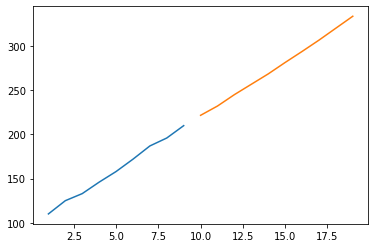

In [ ]:
plt.plot(day_new,timeseries_data)
plt.plot(day_pred,lst_output)